In [2]:
## day7 ## 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt

In [3]:
word = 'grail'
sent = 'a scratch'
word[0]

'g'

In [5]:
word[0:3] # 여러개 참조
sent[-1]
sent[0:-8]

'a'

In [6]:
sent[-9:-8]

'a'

In [7]:
word[:3]

'gra'

In [8]:
sent[:] # 전체

'a scratch'

In [9]:
sent[::2] # 두개 씩 건너뛰어

'asrth'

# 외우기!!!!!!!!!!!!!!!!!!!!!!!

신기

In [10]:
a="world"
s="hello {}"
s.format(a)

'hello world'

In [15]:
print("some digits of pi:{}".format(3.14))
print("some digits of %(cont)s: %(value).2f" % {'cont':'e', 'value':2.718})
# %(value) : 형식기억헤
# cont : 소괄호 안의 key 

some digits of pi:3.14
some digits of e: 2.72


In [16]:
data="""  
kim 990102-1234567
lee 970102-2234567
"""
# 6글자 매칭 with (\d{6}) = \g<1> 
# 7글자 매칭 with (\d{7}) = *******


In [21]:
import re # 정규표현식
pat=re.compile("(\d{6})[-]\d{7}") # - 기호가 반드시 있어야한다 # 왼쪽 여섯자리
pat.sub("\g<1>-*******", data) # abbr.pattern : pat


'  \nkim 990102-*******\nlee 970102-*******\n'

## 생활 코딩 보기 <정규표현식> !!!!!


In [24]:
pat=re.compile('[a-z]')
pat.match("deep")

<re.Match object; span=(0, 1), match='d'>

In [25]:
pat=re.compile('[a-z]+')
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [26]:
pat=re.compile('[a-z]*')
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [27]:
# 공백 문자는 매칭 x
pat=re.compile('[ a-z]+')
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [28]:
pat=re.compile('[ a-z]+')
pat.match("hi de7ep")

<re.Match object; span=(0, 5), match='hi de'>

In [29]:
pat=re.compile('[ a-z7]+')
pat.match("hi de7ep")

<re.Match object; span=(0, 8), match='hi de7ep'>

In [39]:
pat=re.compile('[ a-z6-8]+')
res=pat.match("hi de7ep")
if res :
    print("매치 ok")
    print(res.group())
    
else : # None = 매치되지않았다면 ( 객체로 저장되지 않았다면 )
    print("매치 xx")

매치 ok
hi de7ep


In [61]:
pat=re.compile('[a-z]+')

In [62]:
res=pat.match("3 test")
print(res)

None


In [63]:
res=pat.search("3 test") # match 맨 왼쪽에서 부터 매칭 // search : 문자열 전체를 검색
print(res)

<re.Match object; span=(2, 6), match='test'>


In [64]:
pat.findall("life is too short") # 전체 다 나와


['life', 'is', 'too', 'short']

In [65]:
pat.search("life is too short") # 전체 다 나와

<re.Match object; span=(0, 4), match='life'>

In [68]:
pat.match("7 life is too short") # 전체 다 나와

In [69]:
pat.findall("7 life is too short") # 전체 다 나와

['life', 'is', 'too', 'short']

In [70]:
pat.search("7 life is too short") # 전체 다 나와

<re.Match object; span=(2, 6), match='life'>

In [71]:
pat.match("7 life is too short")

In [72]:
res=pat.finditer("7 life is too short")
print(res)
for i in res:
    print(i)
    # findall에 대한 결과가 iterator형식으로 표현
    

<re.Match object; span=(2, 6), match='life'>
<re.Match object; span=(7, 9), match='is'>
<re.Match object; span=(10, 13), match='too'>
<re.Match object; span=(14, 19), match='short'>


In [73]:
res=pat.match('hello')
res
res.group()
res.start() # 몇번째 위치부터 매치 됫는데
res.end() 
res.span() # match되어진 위치 참조 가능

(0, 5)

In [74]:
# 자연어 처리를 위한 정규표현식중 일반적인 방식 
pat=re.compile('[a-z]+')
res=pat.match("test")
res

<re.Match object; span=(0, 4), match='test'>

In [75]:
res=re.match('[a-z]+',"test")
res

<re.Match object; span=(0, 4), match='test'>

In [77]:
p=re.compile('[abcd]') 
# 대괄호 쓰면 문자열을 쓰고, 대괄호 안쓰면 문자열내 모든 요소에 대한 각각의 매칭이가능 
res=p.match("c")
print(res)

<re.Match object; span=(0, 1), match='c'>


In [78]:
p=re.compile('abcd') 
# 대괄호 쓰면 문자열을 쓰고, 대괄호 안쓰면 문자열내 모든 요소에 대한 각각의 매칭이가능 
res=p.match("c")
print(res)

None


In [81]:
p=re.compile('hello') 
res=p.match("hell") # 왼쪽부터 검색
print(res)

None


In [83]:
p=re.compile('hello|hi')  # | : or 메타문자 
res=p.match("hi") # 왼쪽부터 검색
print(res)

<re.Match object; span=(0, 2), match='hi'>


In [84]:
p=re.compile('hello|hi')  # | : or 메타문자 
res=p.match("hello") # 왼쪽부터 검색
print(res)

<re.Match object; span=(0, 5), match='hello'>


In [85]:
# 대괄호 내 에 꺽쇠 : 꺽쇠뒤 문자열에 대한 부정
pat=re.compile('Life')
res=pat.match('Life is too short') # search 함수 써도 매칭가능
print(res)

<re.Match object; span=(0, 4), match='Life'>


In [86]:
pat=re.compile('Life')
res=pat.match('My Life is too short') # search 함수 써도 매칭가능
print(res)

None


In [87]:
pat=re.compile('Life')
res=pat.search('My Life is too short') # search 함수 써도 매칭가능
print(res)

<re.Match object; span=(3, 7), match='Life'>


In [88]:
pat=re.compile('Life')
res=pat.findall('My Life is too short') # search 함수 써도 매칭가능
print(res)

['Life']


In [89]:
pat=re.compile('Life')
res=pat.findall('My Life is too short Life') # search 함수 써도 매칭가능
print(res)

['Life', 'Life']


In [90]:
pat=re.compile('^Life')
res=pat.match('My Life is too short')
print(res)

None


In [91]:
pat=re.compile('^Life') # 이 문자열의 시작이 Life로 시작하면 (^)
res=pat.search('My Life is too short')
print(res) # => 매칭 실패 = None

None


In [92]:
pat=re.compile('short$') # 문자열의 끝이 short단어 로 끝남
res=pat.search('My Life is too short')
print(res) 

<re.Match object; span=(15, 20), match='short'>


In [93]:
pat=re.compile('short$') # 문자열의 끝이 short단어 로 끝남
res=pat.search('My Life is too short Life') # 맨 마지막껏만 여부 확인한다
print(res) 

None


In [95]:
# 챗봇(AI봇) | 대화중인 2명이상 필수적, 학습시킨다
# 나 : 안녕
# 너 : 왜?
# 나 : 잘 있엇어? => 이와같은 것들은 어디서 얻어내냐 
# => 정규표현식 활용하여 추출
# ex) 소설책 - 인용부호 // 인용부호에 묶여있는 부분 모두 다 추출
# xx가 말했다 " 잘있었니? " => 이를기반을 챗봇 구동


In [97]:
# 그룹 : () 소괄호 이용하여 그룹을 지어준다 
# 하나의 정규식을 여러개의 정규식에 분할하여 의미있게 관리하고함
# 반복여부를 확인하기 위해 그룹핑을 한다 
p=re.compile('ABC')
res=p.match('ABCABCABC DEF')
print(res)


<re.Match object; span=(0, 3), match='ABC'>


In [98]:
p=re.compile('ABC')
res=p.search('ABCABCABC DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [99]:
p=re.compile('ABC')
res=p.findall('ABCABCABC DEF')
print(res)

['ABC', 'ABC', 'ABC']


In [100]:
p=re.compile('ABC')
res=p.search('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [101]:
p=re.compile('ABC')
res=p.match('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [103]:
p=re.compile('[ABC]')
res=p.match('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 1), match='A'>


In [104]:
p=re.compile('[ABC]+')
res=p.match('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [105]:
p=re.compile('[A-C]')
res=p.match('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 1), match='A'>


In [106]:
p=re.compile('[A-C]+')
res=p.match('ABCDABCDABCD DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [108]:
p=re.compile('(ABC)') # () 통한 그룹핑
res=p.match('ABCABCABC DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [109]:
p=re.compile('(ABC)+') # () 통한 그룹핑
res=p.match('ABCABCABC DEF')
print(res) # findall 과 달리 한꺼번에 매칭되어 도출

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [110]:
# 실제 많이 다루는 형식 패턴
# 이름 + "" + 전화번호 
# 해당 문자열 찾기 조회 
# ex) kim 010-1234-5678 (매칭 o) 오직 해당 방식으로만 매칭이 가능하도록 조회
# ex) 010-1234-5678 (매칭 x)
# ex) 010-1234-5678 kim(매칭 x)
# ex) kim010-1234-5678 (매칭 x)
# 
# re.compile("")
# \s[a-zA-Z]
# \w[a-zA-Z0-9]


In [111]:
pat=re.compile("\w")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 1), match='k'>


In [112]:
pat=re.compile("\w+")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 3), match='kim'>


In [113]:
pat=re.compile("[a-z]+")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 3), match='kim'>


In [114]:
pat=re.compile("[a-z]*")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 3), match='kim'>


In [115]:
pat=re.compile("[a-z ]")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 1), match='k'>


In [116]:
pat=re.compile("[a-z ]*")
res=pat.search("kim 010-1234-5678")
print(res)
               

<re.Match object; span=(0, 4), match='kim '>


In [117]:
pat=re.compile("\w+\s") #\s : 공백 문자 한개 \s+ 공백 하나 이상
res=pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 4), match='kim '>


In [118]:
pat=re.compile("\w+\s+") #\s : 공백 문자 한개 \s+ 공백 하나 이상
res=pat.search("kim 010-1234-5678")
print(res)

<re.Match object; span=(0, 4), match='kim '>


In [122]:
pat=re.compile("\w+\s+\d+[-]+\d+[-]+\d+") #\s : 공백 문자 한개 \s+ 공백 하나 이상
res=pat.search("kim 010-1234-5678") # 반드시 나와야 하는 기호 [-] 대괄호 
print(res)

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>


In [123]:
# 그룹핑 ( 소괄호 로 묶는다 )
pat=re.compile("(\w+)\s+(\d+[-]+\d+[-]+\d+)") # 그룹 1, 그룹 2 
res=pat.search("kim 010-1234-5678") # 그룹핑 옵션을 통해 호출
print(res)
# 결과는 다른점없어 

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>


In [124]:
pat=re.compile("(\w+)\s+(\d+[-]+\d+[-]+\d+)") # 그룹 1, 그룹 2 
res=pat.search("kim 010-1234-5678") # 그룹핑 옵션을 통해 호출
print(res)
print(res.group())
# print(res.group(0)) # 매치된전체문자열


<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678


In [125]:
print(res.group(0)) # 매치된전체문자열

kim 010-1234-5678


In [126]:
print(res.group(1)) # 매치된 1번째 그룹문자열

kim


In [127]:
print(res.group(2)) # 매치된 2번째 문자열

010-1234-5678


In [129]:
pat=re.compile("(\w+)\s+(\d+[-]+(\d+)[-]+\d+)") # 그룹 1, 그룹 2 
res=pat.search("kim 010-1234-5678") # 그룹핑 옵션을 통해 호출
print(res)
print(res.group())
print(res.group(3)) # 매치된 2번째 문자열 

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678
1234


In [130]:
re.match('[0-9]*','1234')


<re.Match object; span=(0, 4), match='1234'>

In [131]:
re.match('[0-9]+','1234')

<re.Match object; span=(0, 4), match='1234'>

In [132]:
re.match('[0-9]+','abcd')

In [133]:
print(re.match('a*b', 'a'))

None


In [134]:
print(re.match('a*b', 'ab'))

<re.Match object; span=(0, 2), match='ab'>


In [135]:
print(re.match('a*b', 'b'))

<re.Match object; span=(0, 1), match='b'>


In [137]:
print(re.match('a*b', 'aab'))

<re.Match object; span=(0, 3), match='aab'>


In [138]:
print(re.match('a+b', 'aab'))

<re.Match object; span=(0, 3), match='aab'>


In [139]:
print(re.match('K?', 'K'))

<re.Match object; span=(0, 1), match='K'>


In [140]:
print(re.match('K?', 'K9'))

<re.Match object; span=(0, 1), match='K'>


In [141]:
print(re.match('K?', 'K99'))

<re.Match object; span=(0, 1), match='K'>


In [142]:
print(re.match('K.', 'K99')) # . :문자 1가 있어야 된다

<re.Match object; span=(0, 2), match='K9'>


In [143]:
print(re.match('K?', 'K'))

<re.Match object; span=(0, 1), match='K'>


In [144]:
print(re.match('K?', 'K9'))

<re.Match object; span=(0, 1), match='K'>


In [146]:
print(re.match('k{3}','kkabc'))

None


In [147]:
print(re.match('k{3}','kkkabc'))

<re.Match object; span=(0, 3), match='kkk'>


In [148]:
print(re.match('(k){3}','kkkabc')) # k가 3개

<re.Match object; span=(0, 3), match='kkk'>


In [149]:
print(re.match('(hi){3}','hihihihikkkabc')) 

<re.Match object; span=(0, 6), match='hihihi'>


In [150]:
print(re.match('(hi)','hihihihikkkabc')) 

<re.Match object; span=(0, 2), match='hi'>


In [151]:
print(re.match('[0-9]', '010-123-4567')) 

<re.Match object; span=(0, 1), match='0'>


In [152]:
print(re.match('[0-9]{3}', '010-123-4567'))

<re.Match object; span=(0, 3), match='010'>


In [153]:
print(re.match('[0-9]{1,3}', '010-123-4567'))

<re.Match object; span=(0, 3), match='010'>


In [154]:
print(re.match('[0-9]{3}', '01-123-4567'))

None


In [156]:
print(re.match('[0-9]{1,3}', '01-123-4567'))

<re.Match object; span=(0, 2), match='01'>


In [157]:
print(re.match('[a-zA-Z0-9]+',"Hello123"))

<re.Match object; span=(0, 8), match='Hello123'>


In [159]:
print(re.match('[가-힣]+',"딥러닝")) # 한글

<re.Match object; span=(0, 3), match='딥러닝'>


In [164]:
print(re.match('[^A-Z]+',"hello")) # 대문자를 제외하겠다 

<re.Match object; span=(0, 5), match='hello'>


In [165]:
print(re.match('[^A-Z]+',"helNlo")) # 대문자를 제외하고 출력하겠다

<re.Match object; span=(0, 3), match='hel'>


In [166]:
print(re.match('[^A-Z]+',"hel lo")) # 대문자를 제외하고는 다 출력

<re.Match object; span=(0, 6), match='hel lo'>


In [167]:
print(re.match('^[A-Z]+',"heLlo")) # 대문자로 시작하는것을 하나이상 나왔을때 매칭

None


In [169]:
print(re.match('^[A-Z]+',"HELlo")) # 대문자로 시작하는것을 하나이상 나왔을때 매칭
# => 꺽쇠가 [] 안에 있고 밖에 있고가 의미가 완전히다르다 (제외, 시작)

<re.Match object; span=(0, 3), match='HEL'>


In [171]:
print(re.match('^[0-9]+',"1heLlo")) # 대문자로 시작하는것을 하나이상 나왔을때 매칭

<re.Match object; span=(0, 1), match='1'>


In [172]:
print(re.match('^[0-9a-zA-Z]+',"1heLlo")) # 대문자로 시작하는것을 하나이상 나왔을때 매칭

<re.Match object; span=(0, 6), match='1heLlo'>


In [173]:
print(re.match('[a-z0-9]+$',"dlf7"))
# print(re.match('^',"dlf7564"))
# print(re.match('^',"dlf7564abd"))

<re.Match object; span=(0, 4), match='dlf7'>


In [174]:
print(re.search('[0-9]+$', 'dlf7'))
print(re.search('[0-9]+$', 'dlf7564'))
print(re.search('[0-9]+$', 'dlf7564abd'))

<re.Match object; span=(3, 4), match='7'>
<re.Match object; span=(3, 7), match='7564'>
None


In [175]:
print(re.search( '[*]+',"100 ** 2")) # *이 한개 이상 있는지 판단


<re.Match object; span=(4, 6), match='**'>


In [176]:
print(re.search( '\*+',"100 ** 2")) 
# *이 한개 이상 있는지 판단
# [] 안에는 무조건 문자가 들어와야한다
# 메타문자 : 정규표현식에 사용되는 특별한 의미의 특수문자 
# ex) (), *, [], {} : 특별한 의미가 부여되어 있는 문잗르 

<re.Match object; span=(4, 6), match='**'>


In [181]:
# 그룹과 관련
# "숫자 숫자" 
# ex)
print(re.match('[0-9]+\s[0-9]+',"10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [183]:
print(re.match('[0-9 ]+',"10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [186]:
print(re.match('([0-9]+) ([0-9]+)',"10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [187]:
print(re.match('([0-9]+)\s([0-9]+)',"10 200"))

<re.Match object; span=(0, 6), match='10 200'>


In [192]:
res=re.match('([0-9]+)\s([0-9]+)',"10 200")
res.group(2)
res.group(1)

'10'

In [193]:
res.groups()

('10', '200')

In [195]:
# 정규표현식 복잡해지면서 그룹이 과양산 문제 해결을 위한 고급코딩방식
res=re.match('([0-9]+) ([0-9]+) ([0-9]+)',"010 1234 5678")
res.group(3)

'5678'

In [196]:
# 그룹당 별칭부여 하여 해당 그룹 호출
res=re.match('(?P<ln>[0-9]+) (?P<sn>[0-9]+) (?P<tn>[0-9]+)',"010 1234 5678")
res.group('ln')


'010'

In [198]:
# 1,2,3,4,5,6,7 (길이 1이상 모든수 추출)
print(re.findall('([0-9]+)',"1 2 abc 3 abc 4 5 abc 67"))

['1', '2', '3', '4', '5']


In [203]:
print(re.match('([a-z]+)(\.)([a-z]+)',"hello.world"))

<re.Match object; span=(0, 11), match='hello.world'>


In [201]:
print(re.match('([0-9]+)(\.)',"hello.world"))
# hello.world (o)
# hello.1234 (x)
# hello (o)
# 문자열. 문자열
# 문자열


None


In [204]:
print(re.match('([a-z]+)',"hello.world"))

<re.Match object; span=(0, 5), match='hello'>


In [209]:
print(re.match('([a-z]+)(\.?)',"hello.world"))

<re.Match object; span=(0, 6), match='hello.'>


In [211]:
print(re.match('([a-z]+)(\.?)([^0-9]+)',"hello.world"))

<re.Match object; span=(0, 11), match='hello.world'>


In [212]:
print(re.match("[a-zA-Z]+[.]*[a-zA-Z]*$","hello.world"))

<re.Match object; span=(0, 11), match='hello.world'>


In [213]:
"asfd".capitalize() # 문자열 처리 함수 

'Asfd'

In [214]:
"asfd asfd".count('f')

2

In [223]:
"asfd asfd".startswith("as")
"asfd asfd".endswith("fd")
"asfd asfd".find("s")
"asdfdf asfd".index("asfd")
"asfd asfd".isalpha()
"asfdasfd".isalpha() # true
"222".isdecimal()
"I am 23".isalnum()
"iam23".isalnum()
" sdfjlksdf sfd ".strip() # 양 옆 공백 날리기 

'sdfjlksdf sfd'

In [224]:
df=pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [227]:
def mysq(x):
    return x**2
def myexp(x,n):
    return x**n


In [228]:
print(df.apply(mysq))

   a   b
0  1   4
1  4   9
2  9  16


In [230]:
res=df['a'].apply(mysq)

In [232]:
df['b'].apply(myexp, n=3)

0     8
1    27
2    64
Name: b, dtype: int64

In [240]:
df
def prn(x):
    return print(x)
    

In [241]:
df.apply(prn, axis=0)

0    1
1    2
2    3
Name: a, dtype: int64
0    2
1    3
2    4
Name: b, dtype: int64


a    None
b    None
dtype: object

In [308]:
import seaborn as sns
titanic=sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [320]:
# 각 컬럼단위로 결측치의 개수를 출력  
def count_missing(data):
    null_data = pd.isnull(data)
    null_count = np.sum(null_data)
    return null_count

def prop_missing(data):
    n=count_missing(data)
    return n/data.size
    

In [321]:
cmis_col=titanic.apply(count_missing)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [322]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [323]:
print(titanic.apply(prop_missing))

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


In [324]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [325]:
titanic['num_missing']=print(titanic.apply(count_missing, axis=1))
#print(titanic.apply(prop_missing, axis=1))
print(titanic.head())

0      1
1      0
2      1
3      0
4      1
5      2
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     2
18     1
19     2
20     1
21     0
22     1
23     0
24     1
25     1
26     2
27     0
28     2
29     2
      ..
861    1
862    0
863    2
864    1
865    1
866    1
867    0
868    2
869    1
870    1
871    0
872    0
873    1
874    1
875    1
876    1
877    1
878    2
879    0
880    1
881    1
882    1
883    1
884    1
885    1
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0     

In [317]:
df=pd.read_csv('data/gapminder.tsv',sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [245]:
# 기대수명에따른 평균
df.groupby('year').lifeExp.mean()


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [246]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [251]:
# 1952년 데이터 출력
y1952=df[df.year==1952]
y1952
#==> bullin 참조

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
60,Australia,Oceania,1952,69.120,8691212,10039.595640
72,Austria,Europe,1952,66.800,6927772,6137.076492
84,Bahrain,Asia,1952,50.939,120447,9867.084765
96,Bangladesh,Asia,1952,37.484,46886859,684.244172
108,Belgium,Europe,1952,68.000,8730405,8343.105127


In [254]:
y1952.lifeExp
y1952_mean = y1952.lifeExp.mean() # 모든국가 기대수명 전체평균치

In [262]:
df.groupby('year').lifeExp.mean()
df.groupby('year').lifeExp.agg(np.mean)
df.groupby('year').lifeExp.agg(np.max)
df.groupby('year').lifeExp.agg(np.size)

year
1952    142.0
1957    142.0
1962    142.0
1967    142.0
1972    142.0
1977    142.0
1982    142.0
1987    142.0
1992    142.0
1997    142.0
2002    142.0
2007    142.0
Name: lifeExp, dtype: float64

In [263]:
def myMean(v):
    n=len(v)
    sum=0
    for val in v:
        sum += val
    return sum/n
    

In [264]:
df.groupby('year').lifeExp.agg(myMean) # agg : 집계 함수 (군집단위 함수적용)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [268]:
gm=df.lifeExp.mean()
gm

59.47443936619713

In [326]:
# 평균대비 몇년정도 작은지 큰지 도출해내는 함수 
def mean_diff(data, v):
    n=len(data)
    sum=0
    for value in data:
        sum+=value
    mymean=sum/n
    return mymean-v
    
#     return 각년 수명평균 => 기대수명편균 

In [327]:
print(df.groupby('year').lifeExp.agg(mean_diff,v=gm))


year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


In [330]:
df.groupby('year').lifeExp.agg([np.std,np.mean,np.count_nonzero])
df.groupby('year').lifeExp.agg([np.std,np.mean,np.count_nonzero])

,std,mean,count_nonzero
year,,,
1952,12.225956,49.057620,142.0
1957,12.231286,51.507401,142.0
1962,12.097245,53.609249,142.0
1967,11.718858,55.678290,142.0
1972,11.381953,57.647386,142.0
1977,11.227229,59.570157,142.0
1982,10.770618,61.533197,142.0
1987,10.556285,63.212613,142.0
1992,11.227380,64.160338,142.0


In [332]:
df.groupby('year').lifeExp.agg({'lifeExp':'std','gdp':'median'})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,lifeExp,gdp
year,,
1952,12.225956,45.1355
1957,12.231286,48.3605
1962,12.097245,50.8810
1967,11.718858,53.8250
1972,11.381953,56.5300
1977,11.227229,59.6720
1982,10.770618,62.4415
1987,10.556285,65.8340
1992,11.227380,67.7030


In [333]:
def zscore(x):
    return (x-x.mean()) / x.std()

In [334]:
df.groupby('year').lifeExp.transform(zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
5      -1.882224
6      -2.012809
7      -2.121069
8      -2.002813
9      -2.011488
10     -1.919077
11     -1.919936
12      0.504859
13      0.635469
14      0.926719
15      0.899551
16      0.882328
17      0.833673
18      0.825097
19      0.832432
20      0.660943
21      0.686480
22      0.810767
23      0.779886
24     -0.489174
25     -0.476025
26     -0.438633
27     -0.364480
28     -0.274943
29     -0.138606
          ...   
1674   -1.153155
1675   -0.974833
1676   -0.762541
1677   -0.605105
1678   -0.438681
1679   -0.356947
1680   -0.574157
1681   -0.607491
1682   -0.627106
1683   -0.675005
1684   -0.662486
1685   -0.728956
1686   -0.901731
1687   -1.173861
1688   -1.608598
1689   -2.143415
1690   -2.158168
1691   -2.039541
1692   -0.049617
1693   -0.084897
1694   -0.103433
1695   -0.143639
1696   -0.176805
1697   -0.168889
1698   -0.108647
1699   -0.081621
1700   -0.336974
1701   -1.5749

In [335]:
names1880=pd.read_csv("data/babynames/yob1880.txt",
                     names=['name','sex','births'])
names1880
names1880.shape
names1880.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [336]:
names1880.groupby('sex').births.sum()
# 서로다른 이름의 개수 2000 entries
years=range(1880,2011)
pieces=[]

for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path, names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces, ignore_index=True)
names.shape
# len(pieces) # 하나하나의 요소안에는 df존재 
#     print(frame)
#     print("-"*50,frame)
    
#                      names=['name','sex','births'])

#     pd.read_csv("data/babynames/yob1880.txt",
#                      names=['name','sex','births'])

    

(1690784, 4)

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


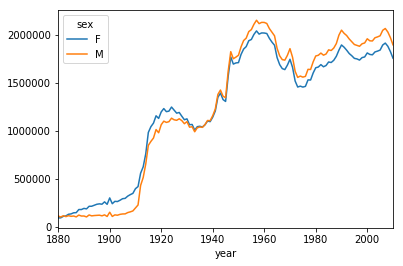

In [337]:
# 피벗테이블
# 연도와 성별에따른데이터를 재구성
# 각각의 연도마다 성별에 따라서 해당연도에 몇명이 있는지를 조사하고 싶다(신생아수)

total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot()
total_births
